In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as ms
sns.set_palette(['#3C4D6F', '#5770A3'])

# Data Wrangle

### Data Gathering

In [3]:
df = pd.read_csv(r'recipe_site_traffic_2212.csv')

### Data Validation

- recipe : Numeric &#10003; ,Unique &#10003;
- calories : Numeric &#10003;
- carbohydrate : Numeric &#10003; 
- sugar : Numeric &#10003;
- protein : Numeric &#10003;
- category : Character &#10003; ,10 groups &#10060; "Chicken Breast" 
- servings : Numeric &#10060; ,"4 as a snack ,6 as a snack"
- high_traffic : Character &#10003;

In [3]:
assert df['recipe'].nunique() == 947

In [4]:
df.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [5]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [6]:
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [7]:
df['high_traffic'].unique()

array(['High', nan], dtype=object)

### Data Assessing

#### Quality 
- InCompleteness Data : calories -> 52 ,carbohydrate -> 52 ,sugar -> 52 ,protein -> 52 ,high_traffic -> 373
- InConsistent Data : servings -> "4 as a snack" ,"6 as a snack" ,category :"Chicken Breast"
- Data Type : servings -> Object

In [8]:
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [9]:
df['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

### Cleaning 

In [4]:
df['servings']=df['servings'].str.strip(' as a snack').astype(int)

In [5]:
df['category']=df['category'].str.replace(' Breast','')

In [6]:
df.fillna(0,inplace=True)

- Missing Values &#10003;
- InConsistent Data &#10003;
- Data Type &#10003;

steps :
- remove  as a snack from serving column and change data type to int
- replace null values with special number '0' to work with it after bu using advanced techniques

# EDA

In [13]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,412.001668,33.143992,8.549799,22.823252,3.477297
std,273.519652,451.463971,43.465360,14.418229,35.781906,1.732741
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,237.500000,88.215000,6.770000,1.450000,2.290000,2.000000
50%,474.000000,264.130000,19.440000,4.140000,9.640000,4.000000
75%,710.500000,576.225000,42.590000,9.285000,28.530000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


In [7]:
df.replace(0,np.nan,inplace=True)

In [8]:
df['high_traffic'].fillna('Low',inplace=True)

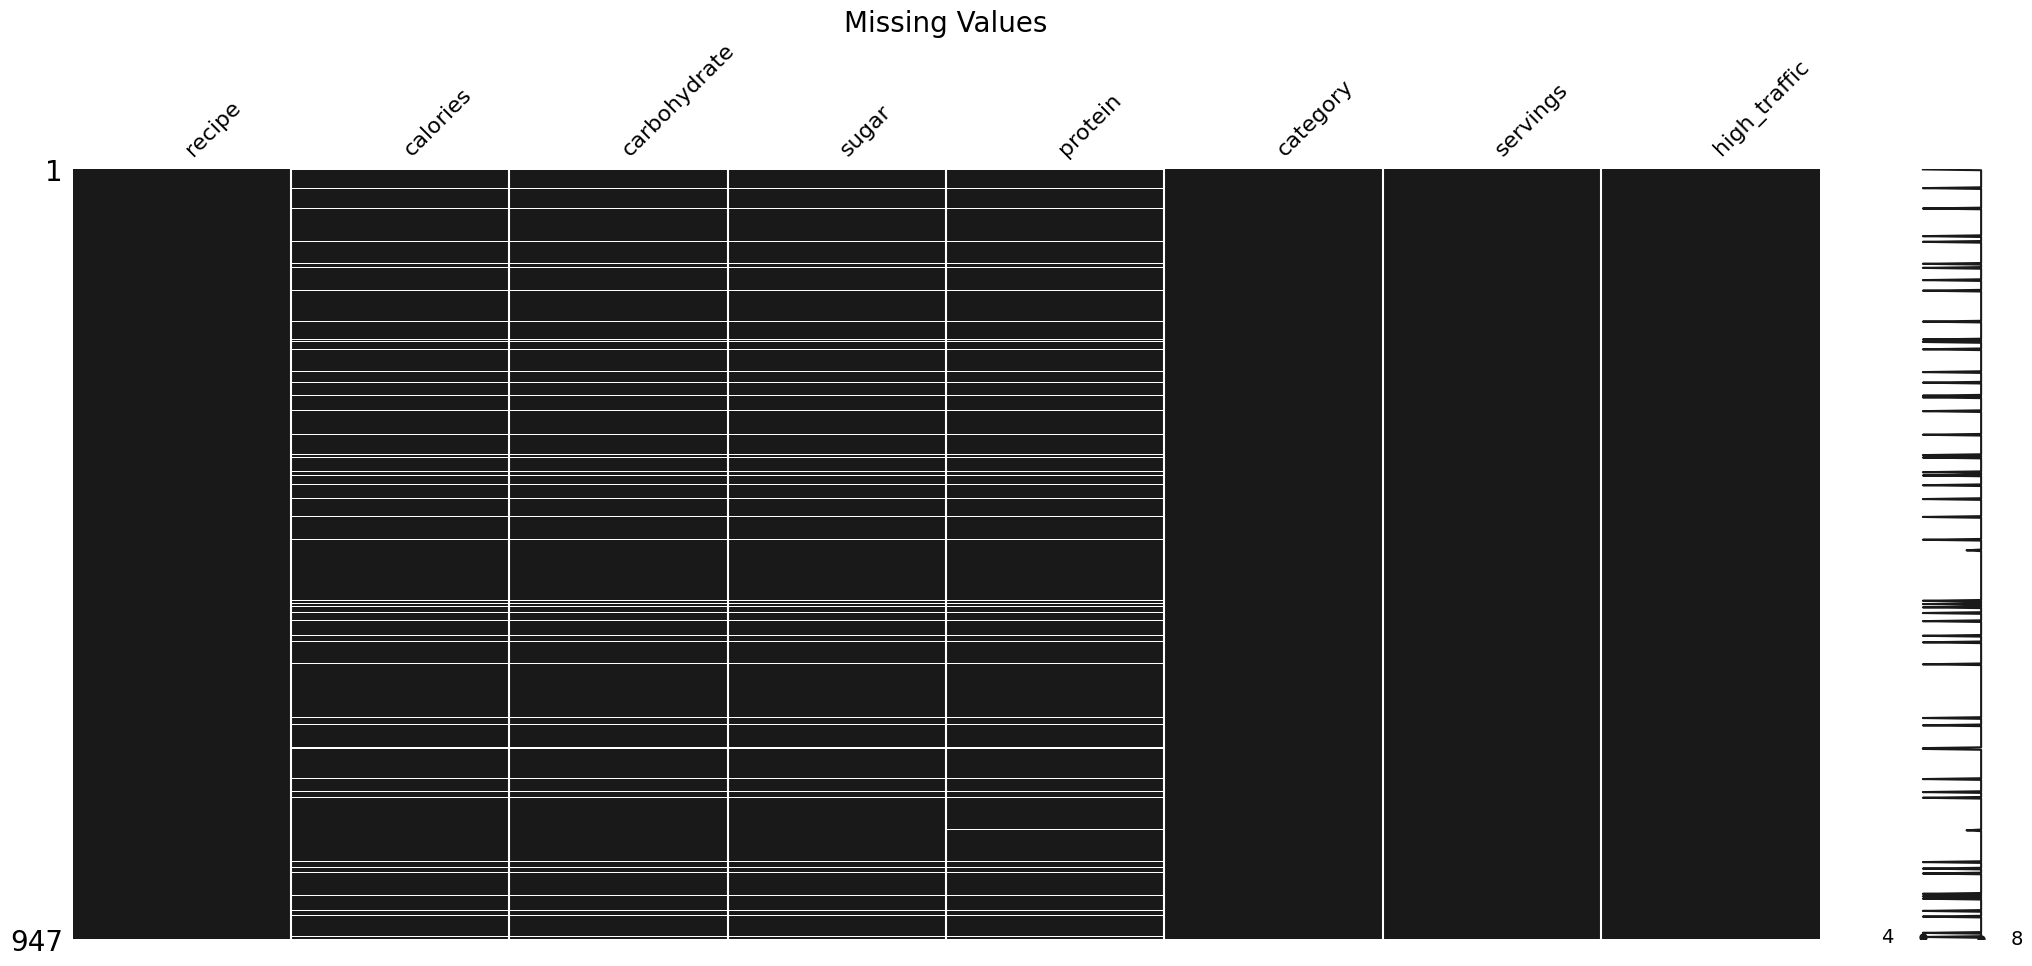

In [9]:
ms.matrix(df,color=(0.1, 0.1, 0.1))
plt.title('Missing Values',size=20)
plt.show()

In [17]:
df[df.isnull().any(axis=1)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


- missing values appear to be MCAR

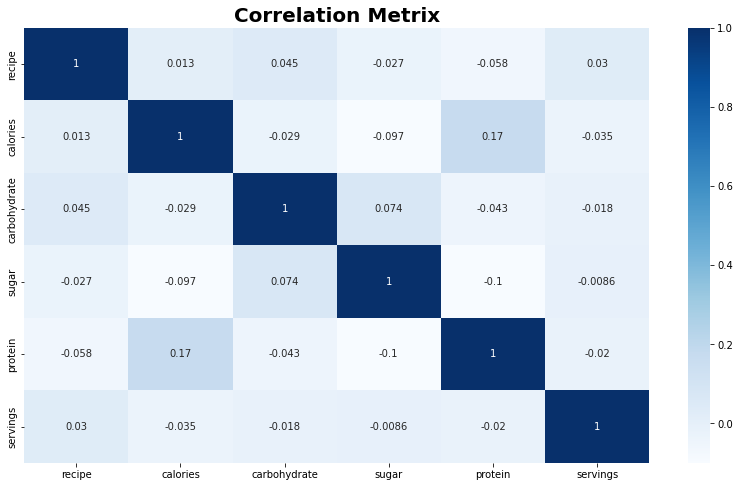

In [18]:
plt.subplots(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correlation Metrix',size=20,fontweight='bold')
plt.show()

- i will try to use KNN ,Iterative ,mean ,median and choose one with highest CV 

In [11]:
df1 = df.copy()

In [12]:
from sklearn.preprocessing import RobustScaler ,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score ,StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer ,SimpleImputer,IterativeImputer
from sklearn.linear_model import LogisticRegression

In [13]:
df1['high_traffic'] = (df1['high_traffic']=='High').astype(int)

In [14]:
df1 = pd.get_dummies(df1,drop_first=True)

In [15]:
df1.drop(columns='recipe',inplace=True)

# Univariate

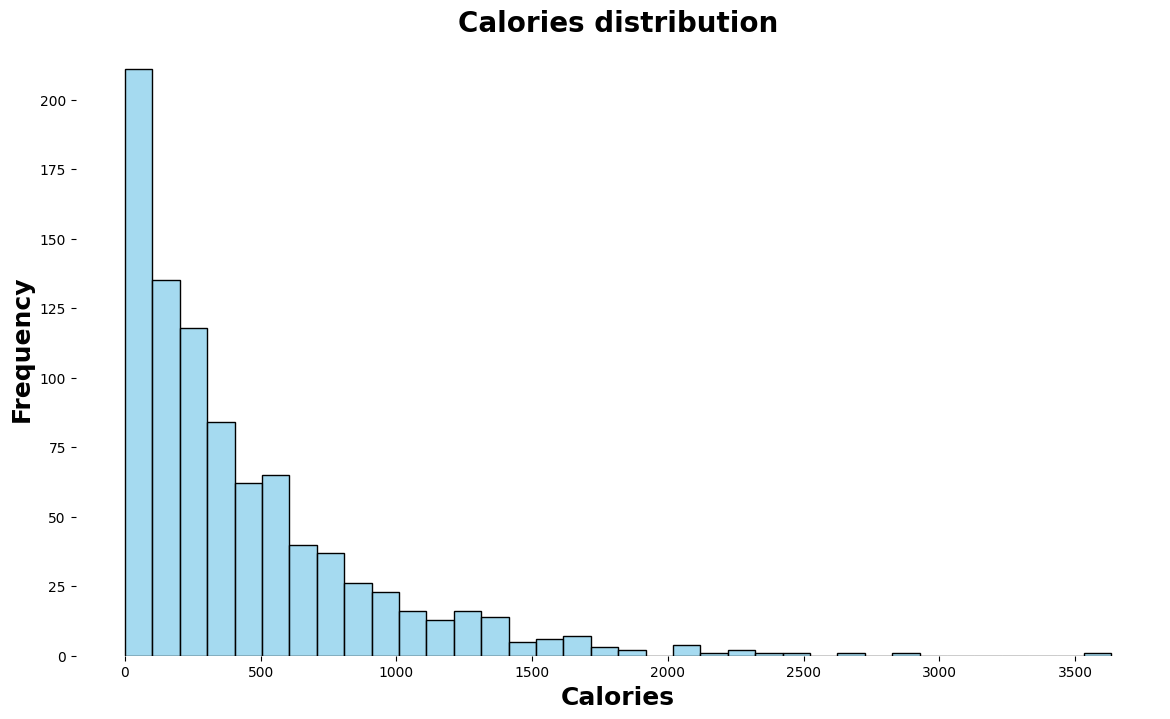

In [63]:
plt.subplots(figsize=(14,8))
plt.box(False)
sns.histplot(data=df1,x='calories',color='skyblue')
plt.xlabel('Calories',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('Calories distribution',size=20,fontweight='bold')
plt.show()

- Most Calories are between 0.14 and 550

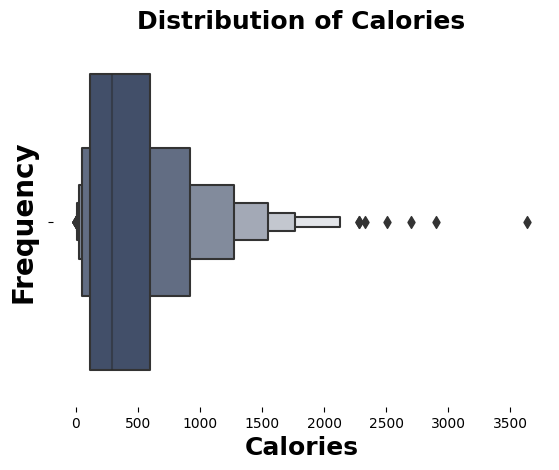

In [75]:
sns.boxenplot(data = df ,x = 'calories')
plt.title("Distribution of Calories",fontsize=18,fontweight='bold')
plt.xlabel("Calories",fontsize=18,fontweight='bold')
plt.ylabel("Frequency",fontsize=20,fontweight='bold')
sns.despine(right=True,left=True,bottom=True,top=True)
# Show the chart
plt.show()

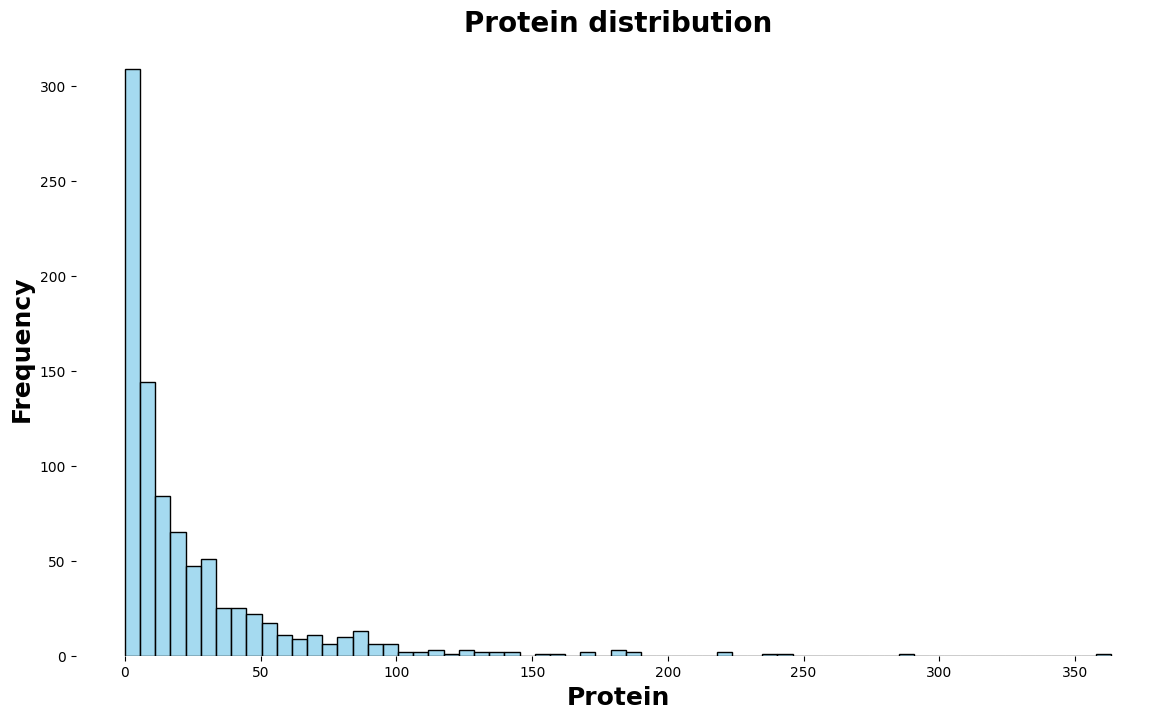

In [64]:
plt.subplots(figsize=(14,8))
plt.box(False)
sns.histplot(data=df1,x='protein',color='skyblue')
plt.xlabel('Protein',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('Protein distribution',size=20,fontweight='bold')
plt.show()

- Most Proteins are between 0.1 and 25

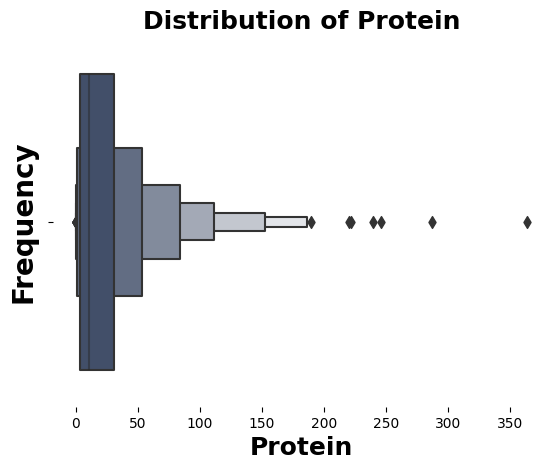

In [74]:
sns.boxenplot(data = df ,x = 'protein')
plt.title("Distribution of Protein",fontsize=18,fontweight='bold')
plt.xlabel("Protein",fontsize=18,fontweight='bold')
plt.ylabel("Frequency",fontsize=20,fontweight='bold')
sns.despine(right=True,left=True,bottom=True,top=True)
# Show the chart
plt.show()

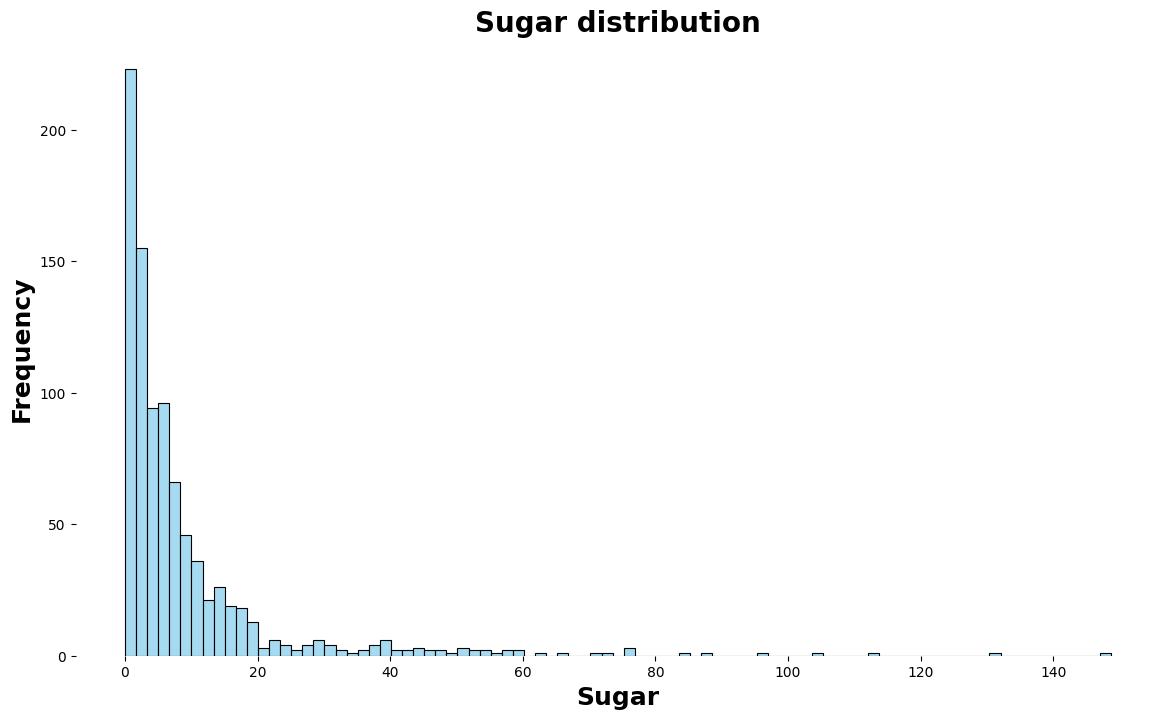

In [65]:
plt.subplots(figsize=(14,8))
plt.box(False)
sns.histplot(data=df1,x='sugar',color='skyblue')
plt.xlabel('Sugar',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('Sugar distribution',size=20,fontweight='bold')
plt.show()

- Most Sugars are between 0.2 and 12

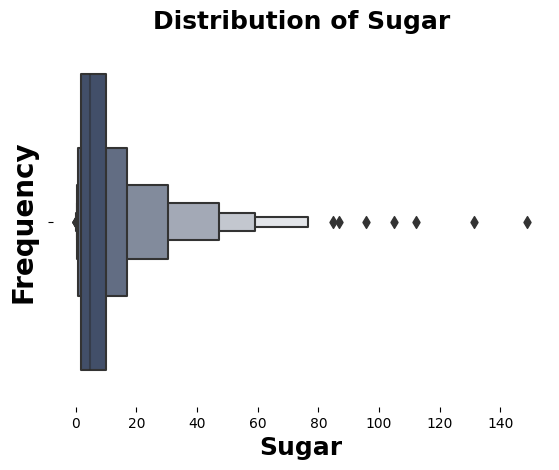

In [73]:
sns.boxenplot(data = df ,x = 'sugar')
plt.title("Distribution of Sugar",fontsize=18,fontweight='bold')
plt.xlabel("Sugar",fontsize=18,fontweight='bold')
plt.ylabel("Frequency",fontsize=20,fontweight='bold')
sns.despine(right=True,left=True,bottom=True,top=True)
# Show the chart
plt.show()

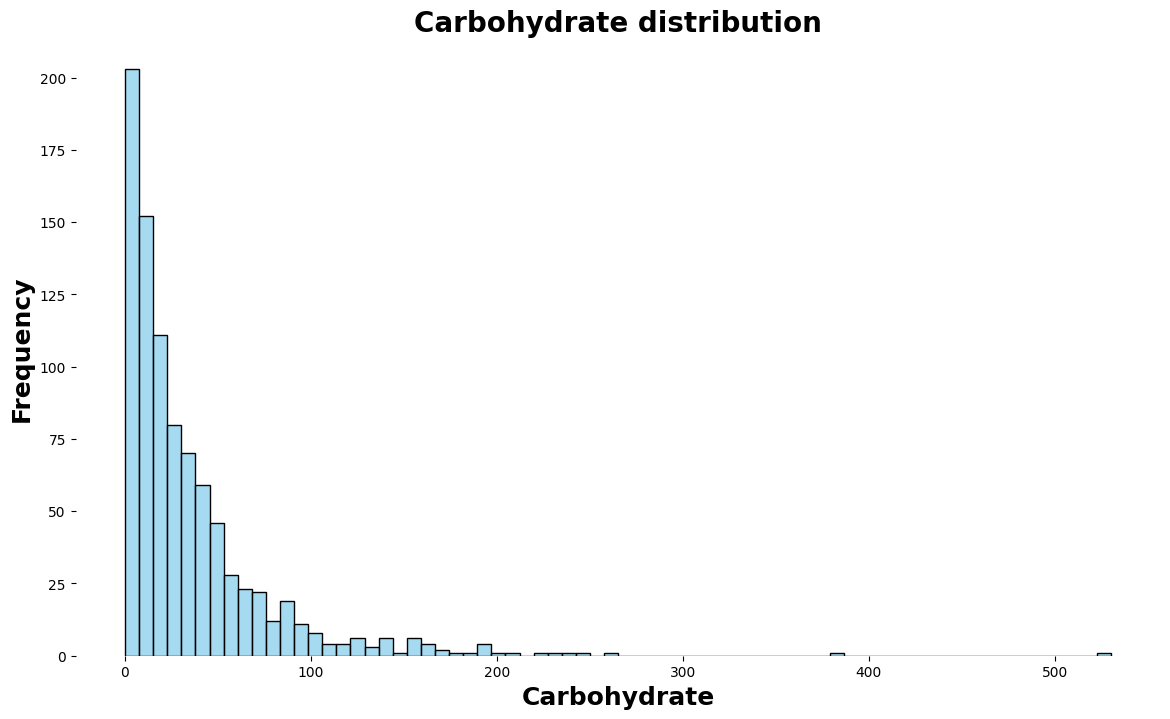

In [67]:
plt.subplots(figsize=(14,8))
plt.box(False)
sns.histplot(data=df1,x='carbohydrate',color='skyblue')
plt.xlabel('Carbohydrate',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('Carbohydrate distribution',size=20,fontweight='bold')
plt.show()

- Most Carbohydrates are between 0.1 and 60

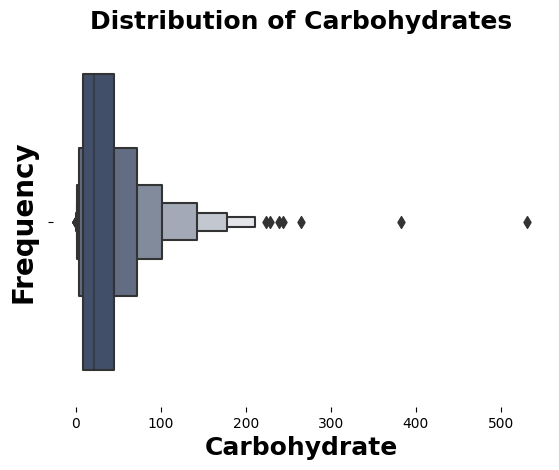

In [72]:
sns.boxenplot(data = df ,x = 'carbohydrate')
plt.title("Distribution of Carbohydrates",fontsize=18,fontweight='bold')
plt.xlabel("Carbohydrate",fontsize=18,fontweight='bold')
plt.ylabel("Frequency",fontsize=20,fontweight='bold')
sns.despine(right=True,left=True,bottom=True,top=True)
# Show the chart
plt.show()

- there are outliers will effect on the model performance

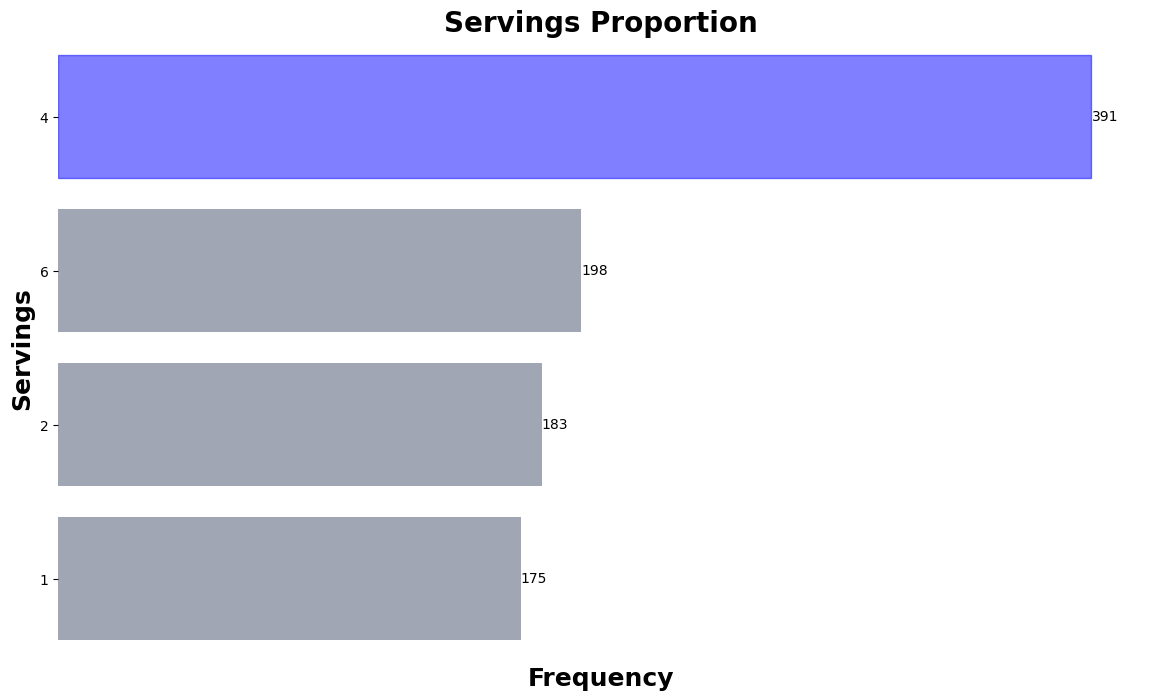

In [76]:
plt.subplots(figsize=(14,8))
bars = sns.countplot(data = df,y='servings',color='#3C4D6F',alpha=0.5,order=[4,6,2,1])
bars.patches[0].set_color('blue')
sns.despine(left = True ,right = True ,bottom = True ,top = True)
for _ in bars.containers:
    bars.bar_label(_)
plt.xticks([])
plt.title('Servings Proportion',fontsize=20, fontweight='bold')
plt.ylabel('Servings',fontsize=18, fontweight='bold')
plt.xlabel('Frequency',fontsize=18, fontweight='bold')
plt.show()

- Most Servings are 4

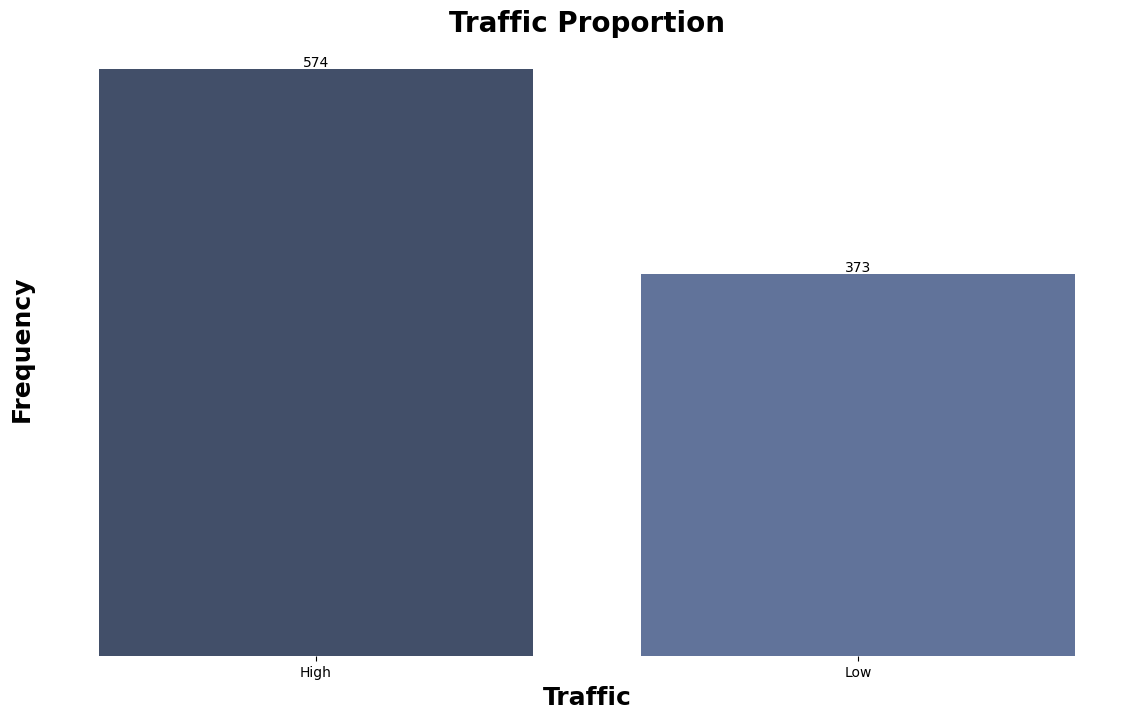

In [27]:
plt.subplots(figsize=(14,8))
bars = sns.countplot(data = df,x='high_traffic')
sns.despine(left = True ,right = True ,bottom = True ,top = True)
for _ in bars.containers:
    bars.bar_label(_)
plt.yticks([])
plt.title('Traffic Proportion',fontsize=20, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.xlabel('Traffic',fontsize=18, fontweight='bold')
plt.show()

- Most Webstire recipes are high

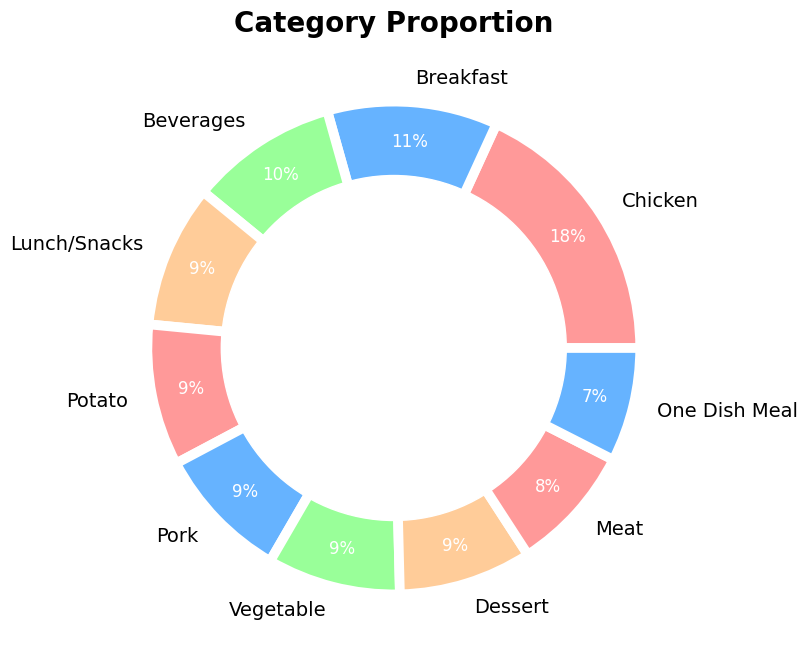

In [29]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax.pie(df['category'].value_counts(), labels=[_ for _ in df['category'].value_counts().index], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.0f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title('Category Proportion',size=20,fontweight='bold')
plt.show()


- most recipes are breakfast ,chichken and beverages

# Bivariate

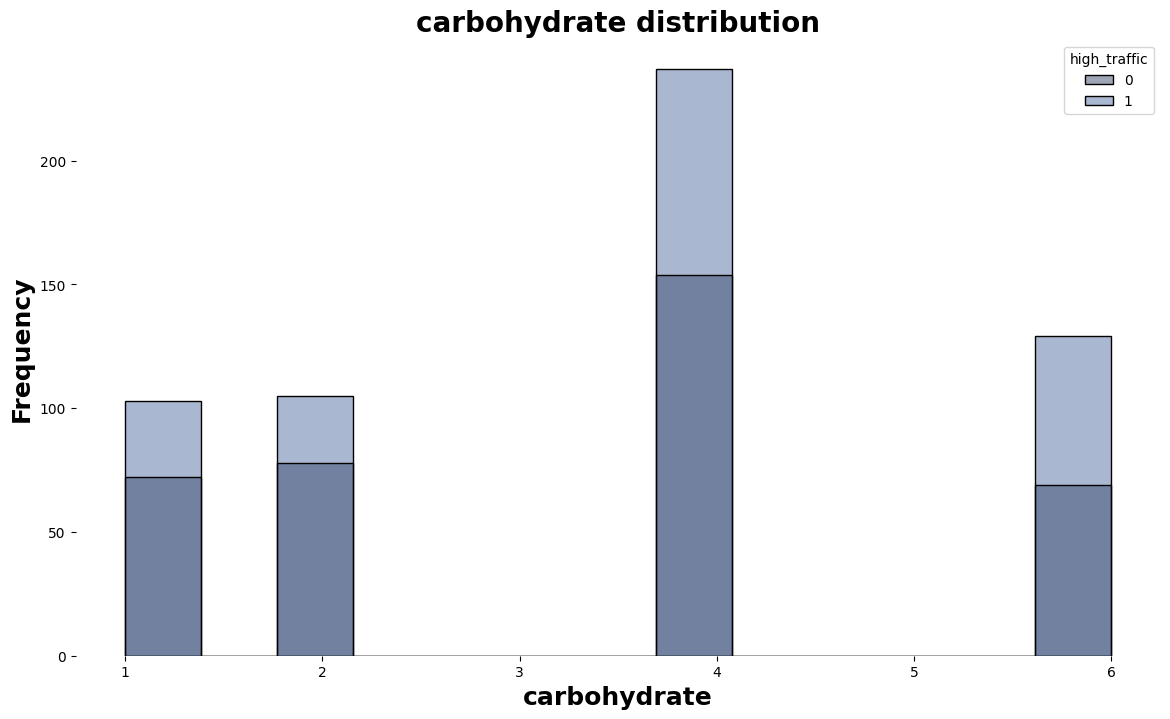

In [16]:
plt.subplots(figsize=(14,8))
plt.box(False)
sns.histplot(data=df1,x='servings',hue='high_traffic',color='skyblue')
plt.xlabel('carbohydrate',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('carbohydrate distribution',size=20,fontweight='bold')
plt.show()

- Most Attractive Recipes are those have 4 servings for high traffic recipes

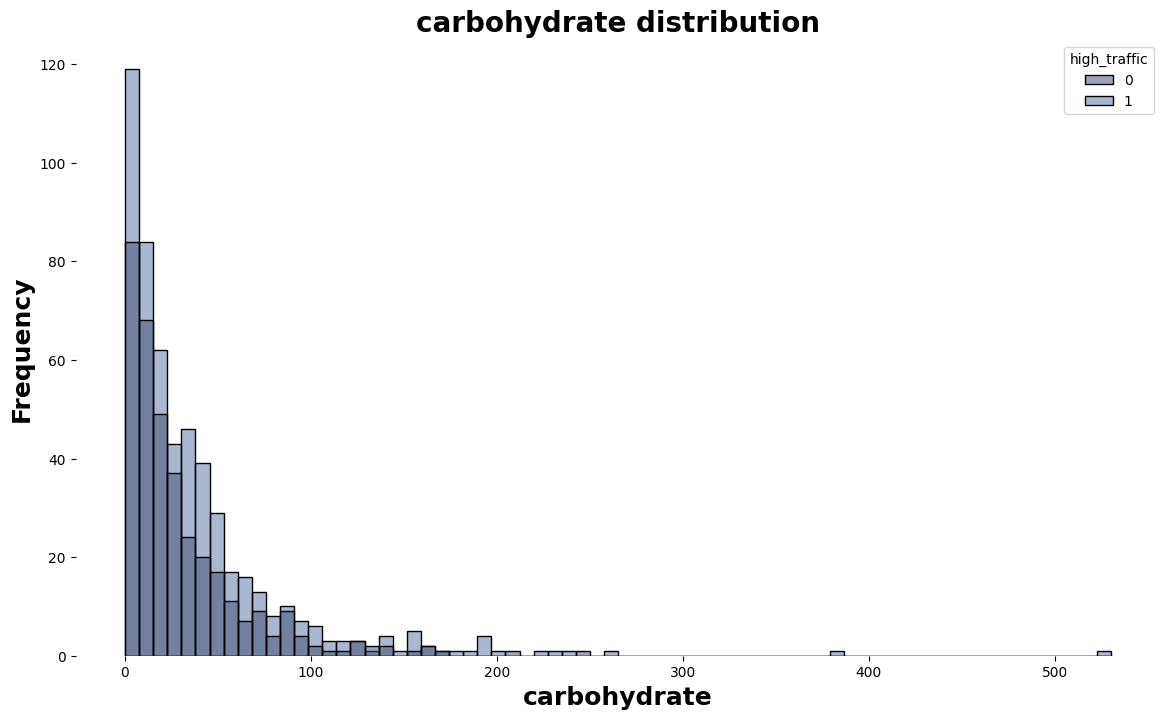

In [44]:
plt.subplots(figsize=(14,8))
plt.box(False)
sns.histplot(data=df1,x='carbohydrate',hue='high_traffic',color='skyblue')
plt.xlabel('carbohydrate',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('carbohydrate distribution',size=20,fontweight='bold')
plt.show()

- Most carbohydrate per recipe for both high and low traffic between 0.03 to 45

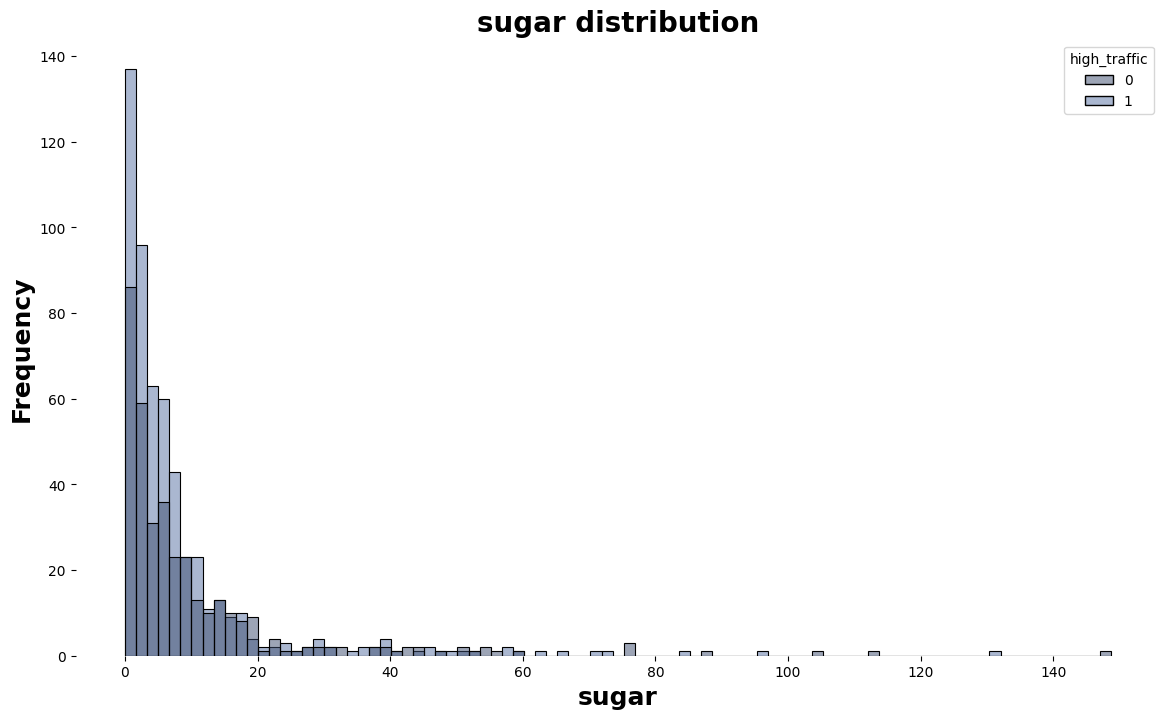

In [43]:
plt.subplots(figsize=(14,8))
plt.box(False)
sns.histplot(data=df1,x='sugar',hue='high_traffic',color='skyblue')
plt.xlabel('sugar',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('sugar distribution',fontsize=20, fontweight='bold')
plt.show()

- Most sugar per recipe for both high and low traffic between 0.01 to 18

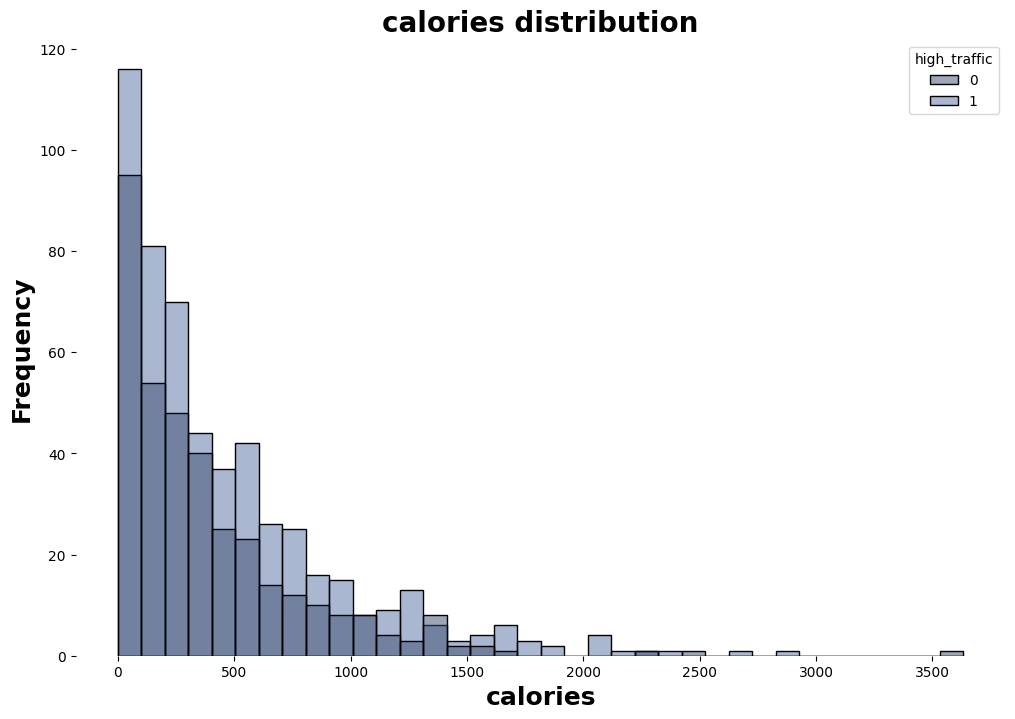

In [41]:
plt.subplots(figsize=(12,8))
sns.histplot(data=df1,x='calories',hue='high_traffic',color='skyblue')
plt.xlabel('calories',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('calories distribution',size=20 ,fontweight='bold')
plt.box(False)
plt.show()

- Most calories per recipe  for both high and low traffic 0.14 to 650

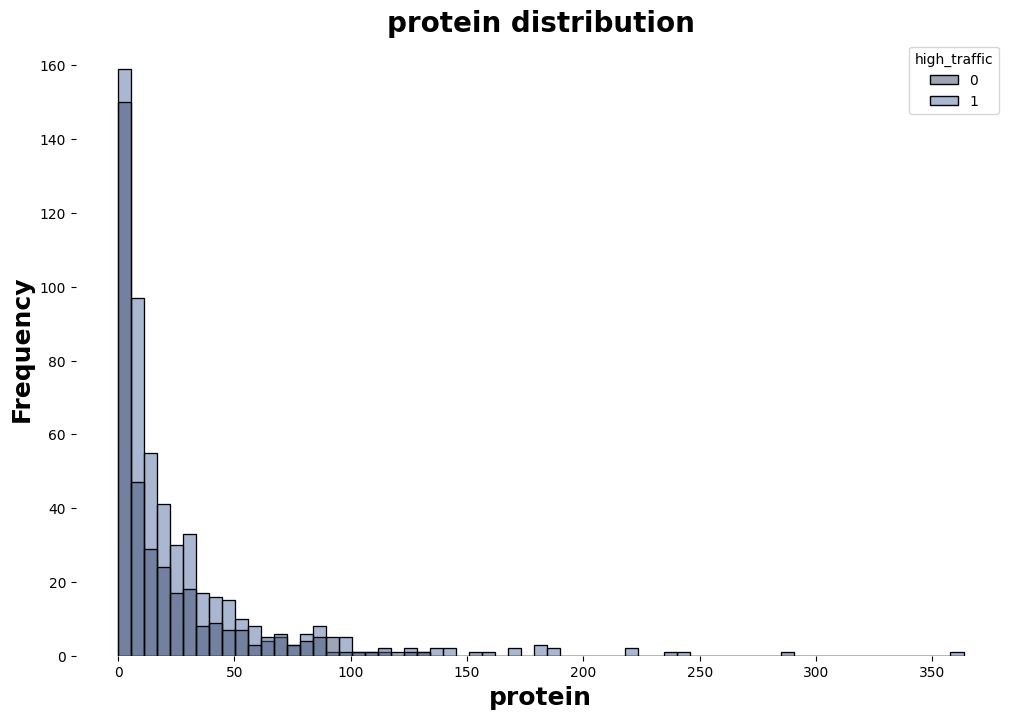

In [42]:
plt.subplots(figsize=(12,8))
sns.histplot(data=df1,x='protein',hue='high_traffic',color='skyblue')
plt.xlabel('protein',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('protein distribution',size=20,fontweight='bold')
plt.box(False)
plt.show()

- Most Protein per recipe for both high and low traffic between 0.01 to 37.5

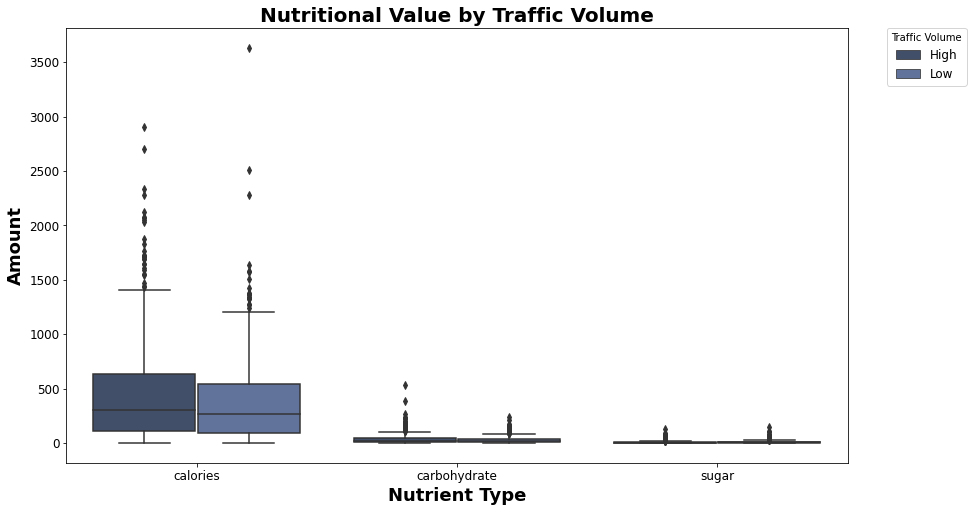

In [28]:
fig, ax = plt.subplots(figsize=(14, 8))
# Reshape the data into long-form
df_long = pd.melt(df, id_vars=['high_traffic'], value_vars=['calories', 'carbohydrate', 'sugar'], var_name='variable', value_name='value')
sns.boxplot(data=df_long, x='variable', y='value', hue='high_traffic', ax=ax)

ax.set_title("Nutritional Value by Traffic Volume", fontsize=20, fontweight='bold')
ax.set_xlabel("Nutrient Type", fontsize=18, fontweight='bold')
ax.set_ylabel("Amount", fontsize=18, fontweight='bold')
ax.tick_params(labelsize=12)

# Set the legend outside the boxplot
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Traffic Volume', fontsize=12)

# Show the plot
plt.show()

- all features that have missing values are skewed specially positive skewed and have outliers

- I have two choices now. The first one is to transform the distribution of columns that have missing values to normal using Cox-Box transformation because their distributions are not normal, which violates the assumptions of linear models. Then, I can apply iterative imputer with a linear model. Alternatively, instead of transforming the data and then applying iterative imputer, I can use non-linear models with iterative imputer, which do not make any assumptions about the data distribution. Additionally, I should scale the data to have the same ranges because any model can be biased towards high variance features, which can lead to the domination of the high variance feature in the calculation and ignore other features that may be more important. This can give us misleading results. Similarly, with KNN imputer, which calculates distance, the same thing can happen.

In [29]:
X = df1.drop(columns='high_traffic')
y = df1['high_traffic']

In [30]:
Continuous_Columns = [_ for _ in X.select_dtypes(include=float).columns]

In [31]:
CT = ColumnTransformer(transformers=[('Distribution_Transforming',PowerTransformer(method='box-cox',standardize=False),Continuous_Columns)])

In [32]:
IterativeImputer = make_pipeline(CT,RobustScaler(),IterativeImputer(random_state=42),LogisticRegression(max_iter=1000,random_state=42))
KNNImputer = make_pipeline(CT,RobustScaler(),KNNImputer(),LogisticRegression(max_iter=1000,random_state=42))
SimpleImputer_mean = make_pipeline(SimpleImputer(strategy='mean'),LogisticRegression(max_iter=1000,random_state=42))
SimpleImputer_median = make_pipeline(SimpleImputer(strategy='median'),LogisticRegression(max_iter=1000,random_state=42))

In [33]:
IM=cross_val_score(IterativeImputer,X,y,cv=StratifiedKFold(n_splits=8,shuffle=True,random_state=42))
KI=cross_val_score(KNNImputer,X,y,cv=StratifiedKFold(n_splits=8,shuffle=True,random_state=42))
MI=cross_val_score(SimpleImputer_mean,X,y,cv=StratifiedKFold(n_splits=8,shuffle=True,random_state=42))
MEI=cross_val_score(SimpleImputer_median,X,y,cv=StratifiedKFold(n_splits=8,shuffle=True,random_state=42))

In [34]:
np.mean(IM),np.std(IM),np.quantile(IM,0.975),np.quantile(IM,0.025)

(0.6525957840763423,
 0.01841025517226366,
 0.6717828656886484,
 0.6206754735792622)

In [35]:
np.mean(KI),np.std(KI),np.quantile(KI,0.975),np.quantile(KI,0.025)

(0.6525957840763423,
 0.01841025517226366,
 0.6717828656886484,
 0.6206754735792622)

In [36]:
np.mean(MI),np.std(MI),np.quantile(MI,0.975),np.quantile(MI,0.025)

(0.7581274035037744,
 0.040204641138280886,
 0.8064360489958695,
 0.686864406779661)

In [37]:
np.mean(MEI),np.std(MEI),np.quantile(MEI,0.975),np.quantile(MEI,0.025)

(0.757068081469876, 0.04040433245465524, 0.8064360489958695, 0.686864406779661)

- we will choose the method according to his CI ,STD ,MEAN
- the Wider CI the more the model performance is inaccurate ,the smaller STD the mean is best method to calculate the model performance 
- mean and median methods are not good because of their CI and STD which are larger than another methods 
- KNN and Iterative Imputer give the same results ,so i will choose KNN Imputer because it doesn't make any assumption about the data then i will exclude distribution transformation from the process and just use scaling method 

# Multivariate

### Business Metric

- " percentage of traffic status for each recipe category "

In [39]:
x = pd.DataFrame(df.groupby(['category','high_traffic'])['high_traffic'].count().div(df.groupby(['category'])['high_traffic'].count(),level='category')*100)

x.columns=['percentage']

x.reset_index(['high_traffic','category'],inplace=True)

x = x.sort_values(by=['high_traffic','percentage'],ascending=[True,False])

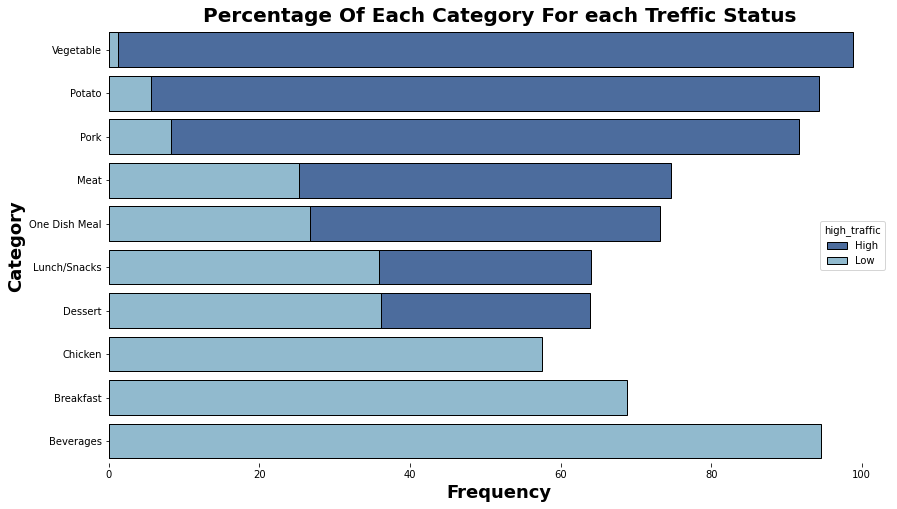

In [40]:
plt.subplots(figsize=(14,8))
custom_palette = {'Low': 'tab:blue', 'High': 'tab:orange'}
sns.barplot(data=x,y='category',x='percentage',hue='high_traffic',palette=['#3f69aa', '#87bdd8'],dodge=False,edgecolor='black')
plt.title('Percentage Of Each Category For each Treffic Status',size=20,fontweight='bold')
plt.ylabel('Category',fontweight='bold',fontsize=18)
plt.xlabel('Frequency',fontweight='bold',fontsize=18)
plt.box(False)
plt.show()

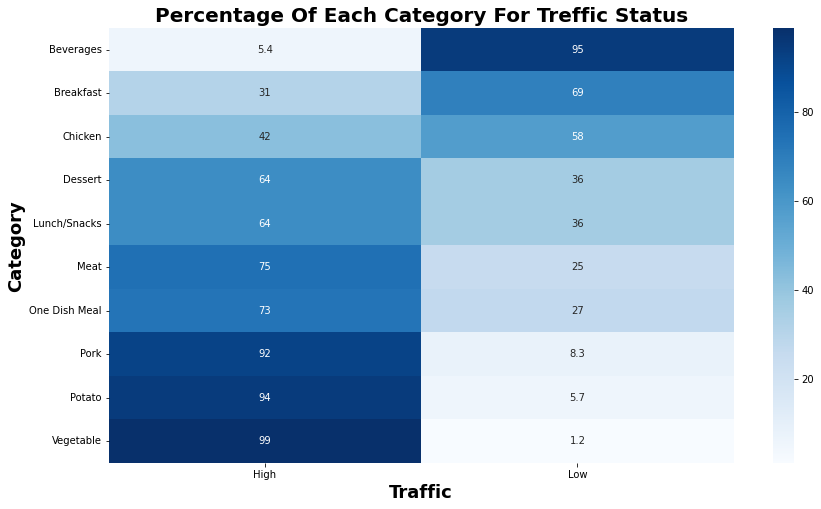

In [41]:
plt.subplots(figsize=(14,8))
sns.heatmap(x.pivot_table(index='category',columns='high_traffic',values='percentage'),annot=True,cmap='Blues')
plt.title('Percentage Of Each Category For Treffic Status',size=20,fontweight='bold')
plt.xlabel('Traffic',size=18,fontweight='bold')
plt.ylabel('Category',size=18,fontweight='bold')
plt.show()

While Most Recipes are High Traffic but The business is focusing on chicken recipes and breakfast, but neither is giving the business a high traffic for their website. If we look at the second chart, we can see that vegetable, potato, pork, and meat recipes are the recipes that receive high traffic from users. Additionally, when I looked at the Category Proportion ,I noticed that these recipes have a lower number of recipes, which could result in losing more users from the website and decrease the traffic.

In [20]:
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


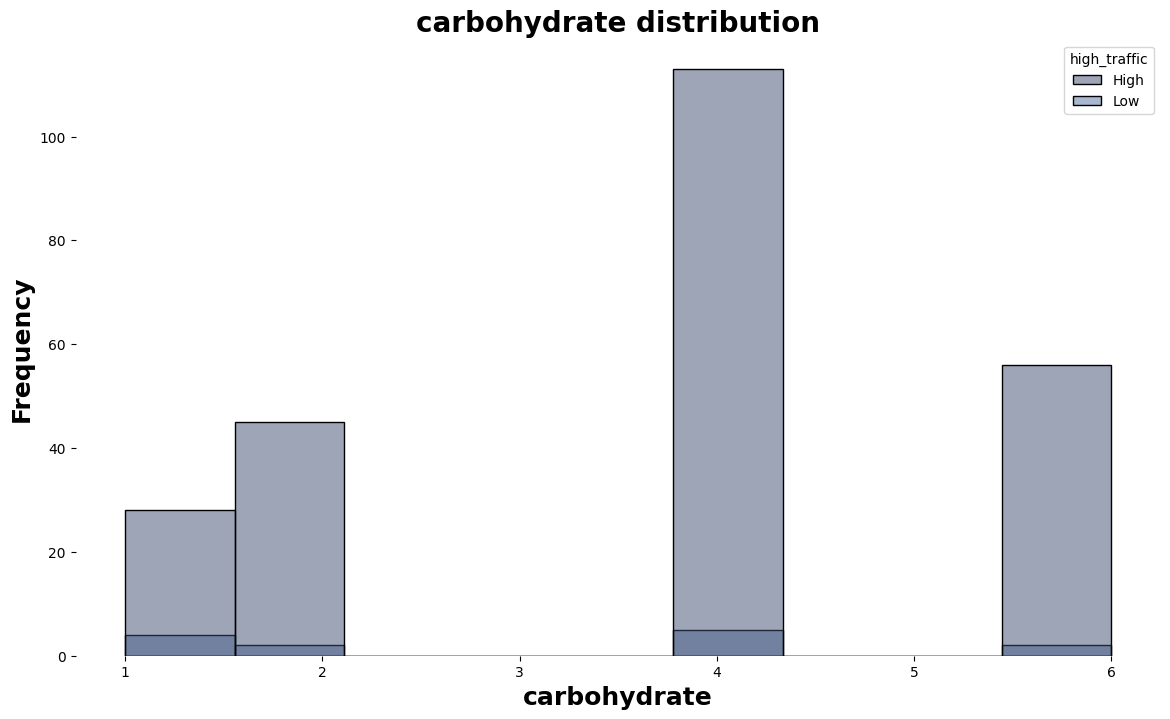

In [21]:
plt.subplots(figsize=(14,8))
plt.box(False)
sns.histplot(data=df[df['category'].isin(['Vegetable','Potato','Pork'])],x='servings',hue='high_traffic',color='skyblue')
plt.xlabel('carbohydrate',fontsize=18, fontweight='bold')
plt.ylabel('Frequency',fontsize=18, fontweight='bold')
plt.title('carbohydrate distribution',size=20,fontweight='bold')
plt.show()

- 4 servings recipes are most attractive those categories

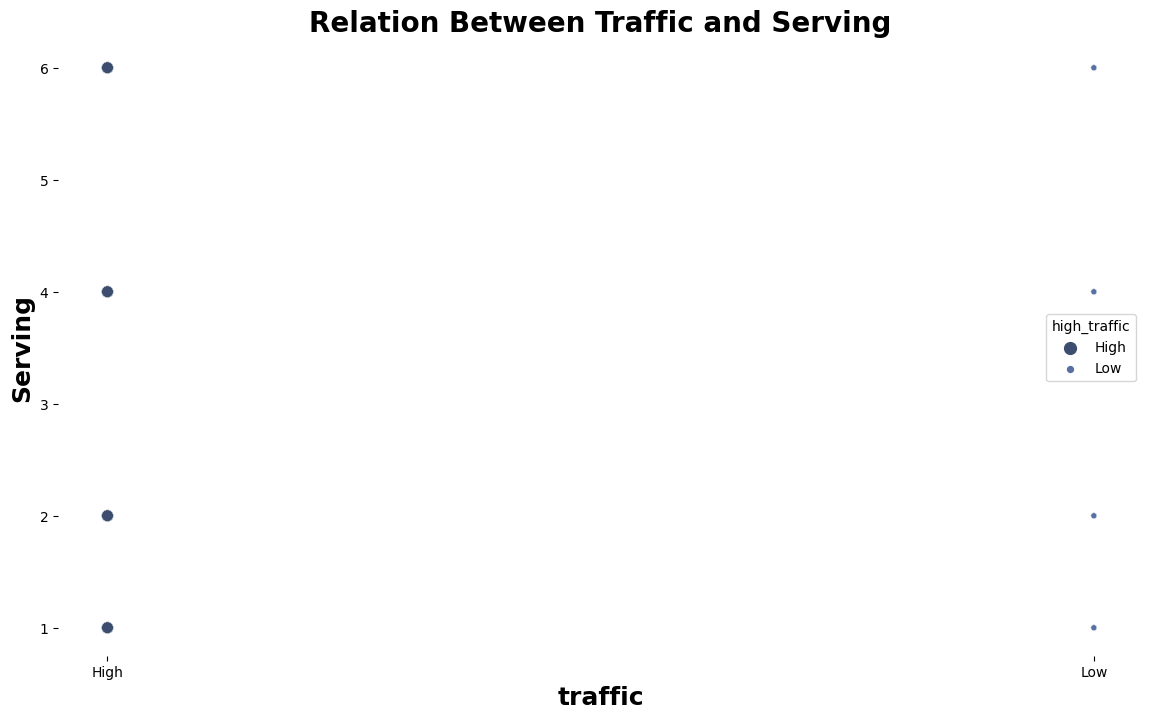

In [31]:
plt.subplots(figsize=(14,8))
sns.scatterplot(data=df ,x='high_traffic',y='servings',hue='high_traffic',size='high_traffic',color='blue')
plt.title('Relation Between Traffic and Serving',size=20,fontweight='bold')
plt.ylabel('Serving',size=18,fontweight='bold')
plt.xlabel('traffic',size=18,fontweight='bold')
plt.box(False)
plt.grid(False)
plt.show()

- there is no relation between traffic and servings

# Machine Learning 

Problem Type : Classification

## PreProcessing

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df1.drop(columns='high_traffic')
y = df1['high_traffic']

In [45]:
X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,stratify=y ,shuffle=True ,train_size=0.8 ,random_state=42)

In [46]:
y_train.value_counts(normalize=True)

1    0.606341
0    0.393659
Name: high_traffic, dtype: float64

In [47]:
y.value_counts(normalize=True)

1    0.606125
0    0.393875
Name: high_traffic, dtype: float64

### Baseline Model

- because the business goal is to predict high traffic recipes so we don't need false negative of false positive ,so our score will be f-beta score with beta value which is focusing on false positive more than false negative because we don't need low traffic recipes to be selected as high traffic recipes which will decrease traffic on website

In [48]:
from sklearn.impute import KNNImputer
from sklearn.metrics import fbeta_score ,make_scorer

In [49]:
f_beta = make_scorer(fbeta_score,beta=0.8)

Creating

In [50]:
BaseLine_model = make_pipeline(RobustScaler(),KNNImputer(),LogisticRegression(class_weight='balanced',random_state=42))

Calculate Cross Validation Score

In [51]:
Baseline_Cross_validation_Scores = cross_val_score(BaseLine_model,X_train,y_train,cv=StratifiedKFold(n_splits=8,shuffle=True,random_state=42),scoring=f_beta)

In [52]:
np.mean(Baseline_Cross_validation_Scores),np.std(Baseline_Cross_validation_Scores),np.quantile(Baseline_Cross_validation_Scores,0.975),np.quantile(Baseline_Cross_validation_Scores,0.025)

(0.768002282246343,
 0.023186353848357922,
 0.7996421468339355,
 0.7333971079601509)

Calculating Training Score

In [53]:
BaseLine_model.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()), ('knnimputer', KNNImputer()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [54]:
fbeta_score(y_train,BaseLine_model.predict(X_train),beta=0.8)

0.7752399676188273

- no overfitting problem  
|Cross Validation|Training|
|---|---|
|0.768|0.775|
- CI is narrower ,so the average performance of CVS is close to the true performance ,Considering to STD which is small 

## Lets Checks The Logistics Regression Assumptions 

In [55]:
predictors = X_train.copy()
RS = RobustScaler()
KNN = KNNImputer()
predictors = pd.DataFrame(RS.fit_transform(predictors),columns=RS.get_feature_names_out())
predictors = pd.DataFrame(KNN.fit_transform(predictors),columns=RS.get_feature_names_out())

### Assumption 1— Appropriate Outcome Type
- so the type of logistic regression utilized (binary, multinomial, or ordinal) must match the outcome (dependent) variable in the dataset.

In [56]:
y.unique()

array([1, 0])

- the assumption is satisfied.

### Assumption 2 — Linearity of independent variables and log-odds


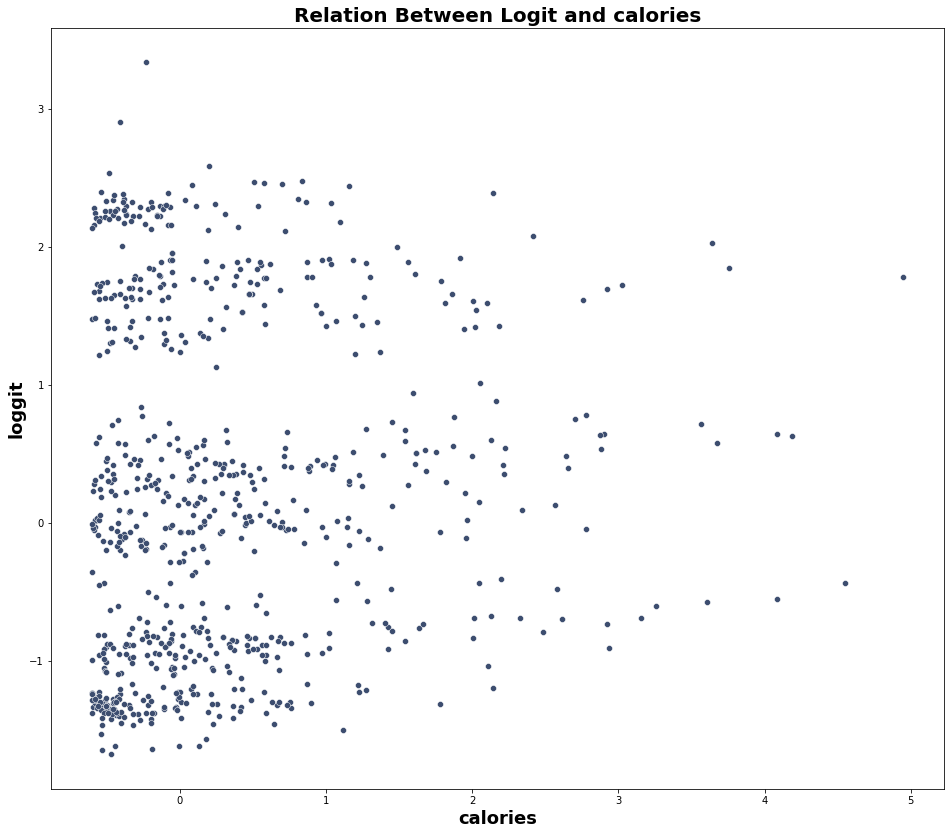

In [57]:
plt.subplots(figsize=(16,14))
sns.scatterplot(x=predictors['calories'],y=BaseLine_model.predict_log_proba(X_train)[:,1]-BaseLine_model.predict_log_proba(X_train)[:,0])
plt.title('Relation Between Logit and calories',size=20,fontweight='bold')
plt.xlabel('calories',size=18,fontweight='bold')
plt.ylabel('loggit',size=18,fontweight='bold')
plt.show()

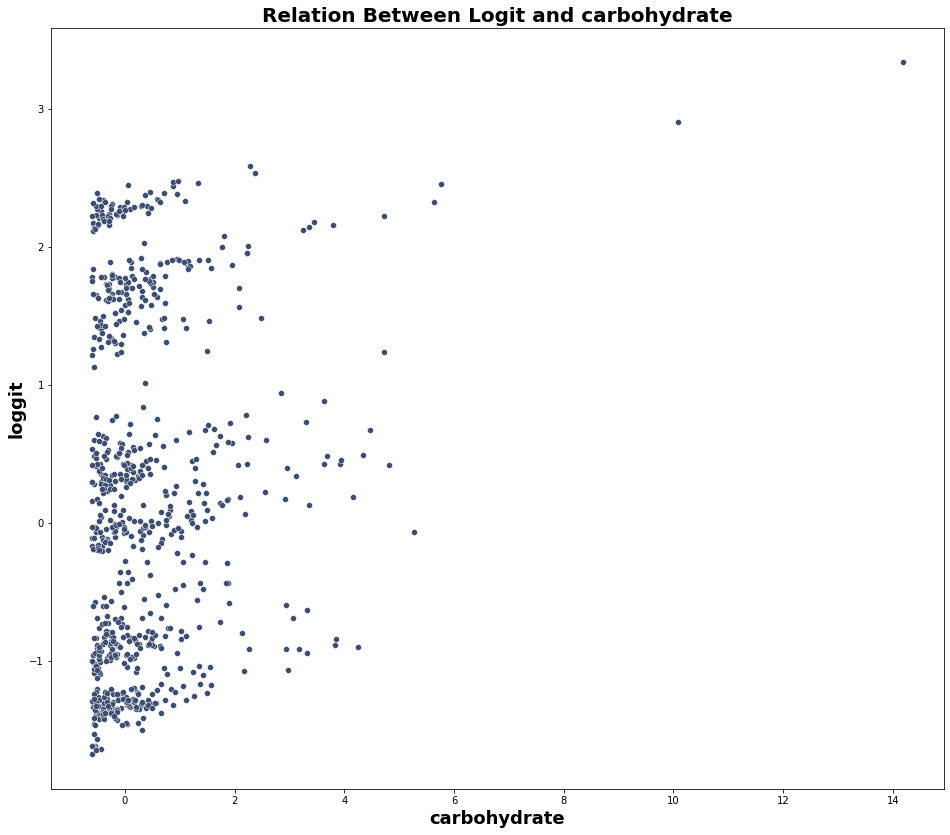

In [58]:
plt.subplots(figsize=(16,14))
sns.scatterplot(x=predictors['carbohydrate'],y=BaseLine_model.predict_log_proba(X_train)[:,1]-BaseLine_model.predict_log_proba(X_train)[:,0])
plt.title('Relation Between Logit and carbohydrate',fontweight='bold',size=20)
plt.xlabel('carbohydrate',size=18,fontweight='bold')
plt.ylabel('loggit',size=18,fontweight='bold')
plt.show()

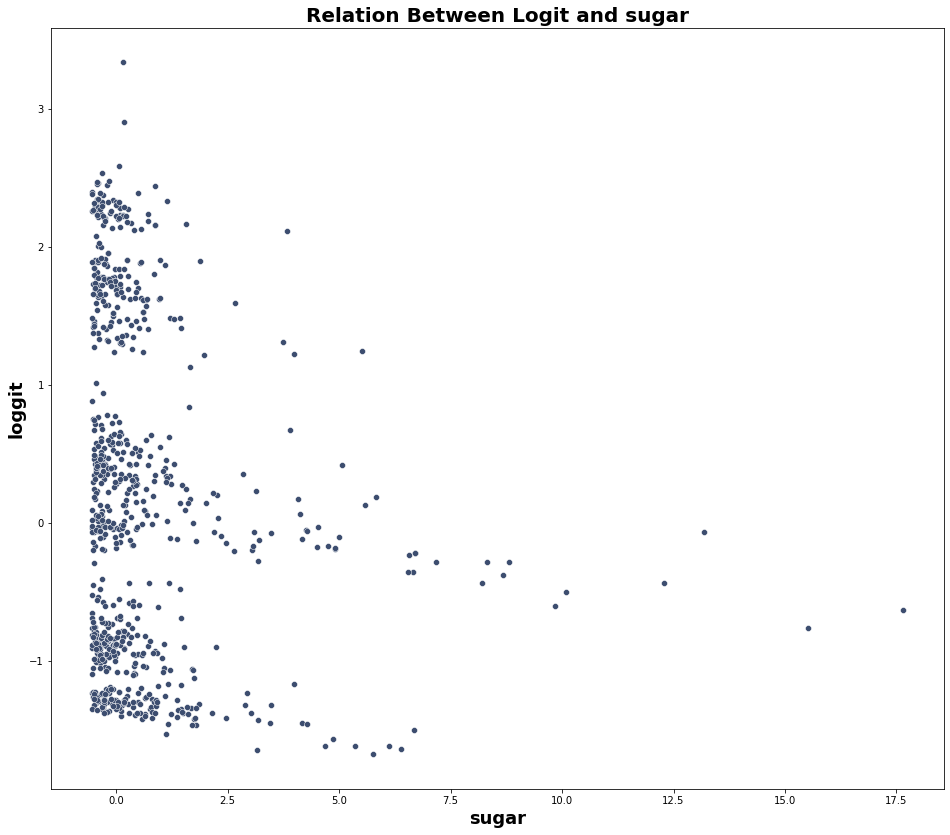

In [59]:
plt.subplots(figsize=(16,14))
sns.scatterplot(x=predictors['sugar'],y=BaseLine_model.predict_log_proba(X_train)[:,1]-BaseLine_model.predict_log_proba(X_train)[:,0])
plt.title('Relation Between Logit and sugar',size=20,fontweight='bold')
plt.xlabel('sugar',size=18,fontweight='bold')
plt.ylabel('loggit',size=18,fontweight='bold')
plt.show()

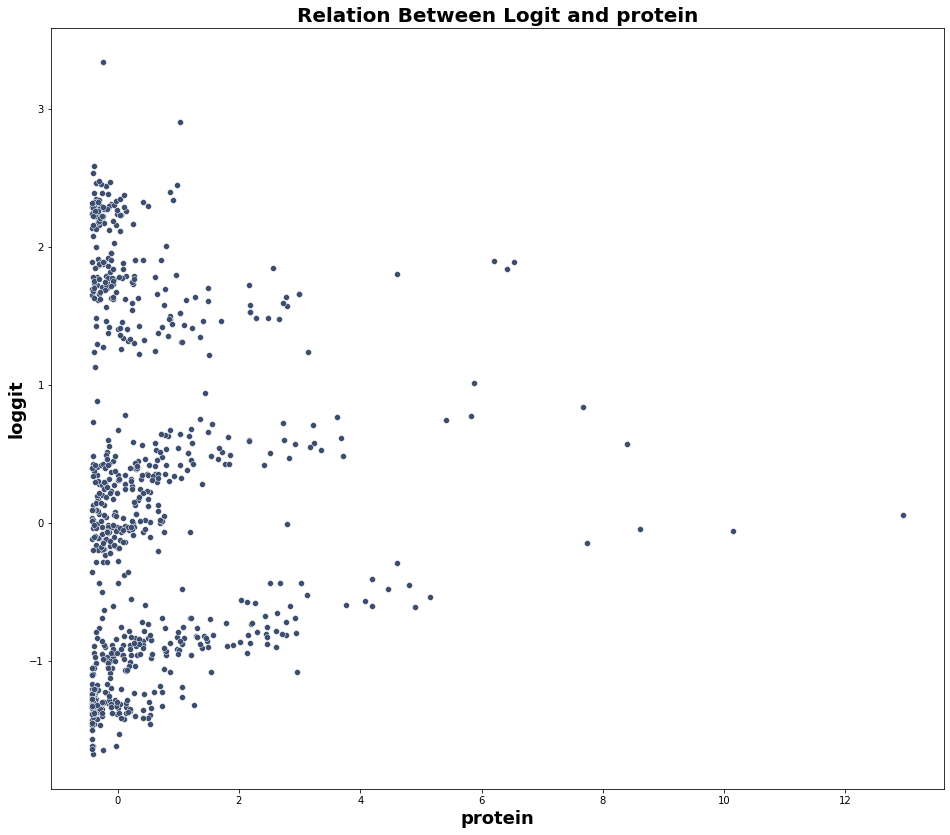

In [60]:
plt.subplots(figsize=(16,14))
sns.scatterplot(x=predictors['protein'],y=BaseLine_model.predict_log_proba(X_train)[:,1]-BaseLine_model.predict_log_proba(X_train)[:,0])
plt.title('Relation Between Logit and protein',size=20,fontweight='bold')
plt.xlabel('protein',size=18,fontweight='bold')
plt.ylabel('loggit',size=18,fontweight='bold')
plt.show()

In [61]:
Assu2 = pd.merge(predictors[['calories', 'carbohydrate', 'sugar', 'protein']],pd.DataFrame(BaseLine_model.predict_log_proba(X_train)[:,1]-BaseLine_model.predict_log_proba(X_train)[:,0]),left_index=True ,right_index=True)

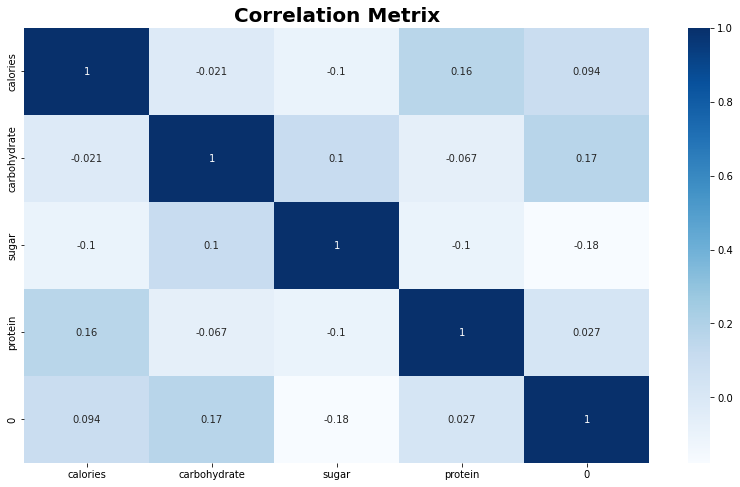

In [62]:
plt.subplots(figsize=(14,8))
sns.heatmap(Assu2.corr(),annot=True,cmap='Blues')
plt.title('Correlation Metrix',size=20,fontweight='bold')
plt.show()

- second assumption is violated

### Assumption 3 — Absence of Multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [64]:
predictors = predictors.assign(constant=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictors, i) for i in range(predictors.shape[1])]
vif["Predictor"] = predictors.columns


In [65]:
vif

,VIF Factor,Predictor
0,1.120951,calories
1,1.124653,carbohydrate
2,1.533786,sugar
3,1.319243,protein
4,1.024133,servings
5,2.047808,category_Breakfast
6,3.026708,category_Chicken
7,2.161867,category_Dessert
8,2.037628,category_Lunch/Snacks
9,2.033200,category_Meat


- the assumption is satisfied.

### Assumption 4— No strongly influential outliers

In [66]:
y_prob = BaseLine_model.predict_proba(X_train)

In [67]:
model = sm.OLS(y_prob[:,1], predictors)
results = model.fit()
influence = results.get_influence().cooks_distance[0]
np.argsort(influence)[-2:]

array([691, 349], dtype=int64)

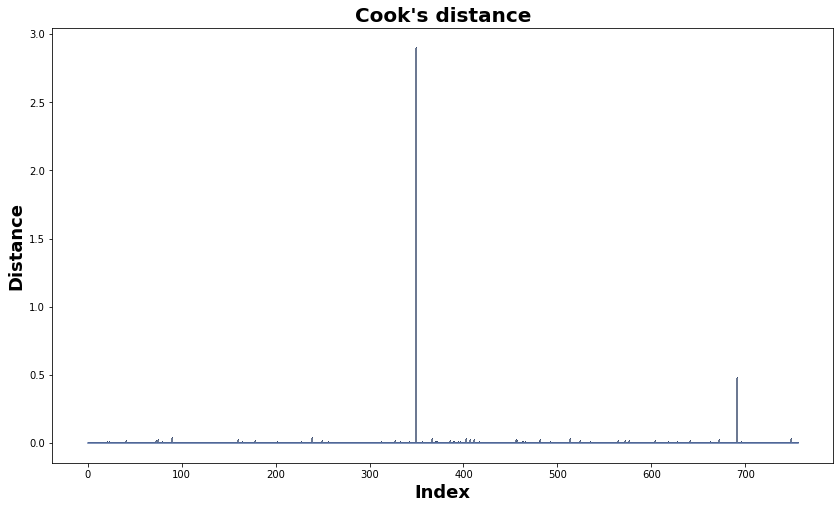

In [68]:
plt.subplots(figsize=(14,8))
plt.stem(influence, markerfmt=",")
plt.title(r"Cook's distance",size=20,fontweight='bold')
plt.xlabel('Index',size=18,fontweight='bold')
plt.ylabel('Distance',size=18,fontweight='bold')
plt.show()

In [69]:
X_train.drop([691, 349],inplace=True)
y_train.drop([691, 349],inplace=True)

- now the assumption is satisfied.

In [70]:
Baseline_Cross_validation_Scores = cross_val_score(BaseLine_model,X_train,y_train,cv=StratifiedKFold(n_splits=8,shuffle=True,random_state=42),scoring=f_beta)

In [71]:
np.mean(Baseline_Cross_validation_Scores),np.std(Baseline_Cross_validation_Scores),np.quantile(Baseline_Cross_validation_Scores,0.975),np.quantile(Baseline_Cross_validation_Scores,0.025)

(0.7624548789508818,
 0.03179564363886498,
 0.8083404219161379,
 0.7164692708478857)

In [72]:
BaseLine_model.fit(X_train,y_train)
fbeta_score(y_train,BaseLine_model.predict(X_train),beta=0.8)

0.7741691842900302

|Cross Validation|Training|
|---|---|
|0.762|0.774|

In [73]:
Baseline_Score = 0.762

- the model violated one assumption 

### Comparison Model

In [74]:
from xgboost import XGBClassifier

Creating

In [75]:
Comparison_Model = make_pipeline(RobustScaler(),KNNImputer(),XGBClassifier(n_estimators = 18 ,max_depth = 2,random_state = 42))

Calculate Cross Validation Score

In [76]:
Comparison_Cross_validation_Scores = cross_val_score(Comparison_Model,X_train,y_train,cv=StratifiedKFold(n_splits=8,shuffle=True,random_state=42),scoring=f_beta)

In [77]:
np.mean(Comparison_Cross_validation_Scores),np.std(Comparison_Cross_validation_Scores),np.quantile(Comparison_Cross_validation_Scores,0.975),np.quantile(Comparison_Cross_validation_Scores,0.025)

(0.784678565625829,
 0.027898415414112497,
 0.8158895186696278,
 0.737959024751369)

Calculating Training Score

In [78]:
Comparison_Model.fit(X_train,y_train)
fbeta_score(y_train,Comparison_Model.predict(X_train),beta=0.8)

0.799968274111675

- no overfitting problem
- CI is narrow ,STD is small ,So the true performance of the model is closed to 0.785 

|Cross Validation|Training|
|---|---|
|0.785|0.799|

# Comparison

Logistic regression is a type of linear and parametric model, which makes assumptions about the data distribution. On the other hand, XGBoost is a type of non-linear and non-parametric model that does not make any assumptions about the data distribution. Additionally, XGBoost is an ensemble model that combines weak learners to handle underfitting. Each weak learner tries to correct the misclassifications of the previous learner by giving more probability to the misclassified points in the subsequent training iterations. This process is repeated n times.

To compare the performance of the models, we will first compare the CV and training scores for each model to determine overfitting. Then, we will calculate the confidence interval (CI) and standard deviation (STD) for each model. Finally, we will compare the comparison model with the baseline.

BaseLine Model

|Cross Validation|Training|CI->2.5|CI->97.5|STD|
|---|---|---|---|---|
|0.76|0.77|0.72|0.81|0.03|

- Cross Validation Score is close to Training Score ,so there is no overfitting problem
- CI is between 0.72 to 0.81 which is not wider or narrower in addition to STD is small which means the scores are closer to each others

Comparison Model

|Cross Validation|Training|CI->2.5|CI->97.5|STD|
|---|---|---|---|---|
|0.79|0.8| 0.74|0.82|0.03|

- Cross Validation Score is close to Training Score ,so there is no overfitting problem
- CI is between 0.74 to 0.82 which is not wider or narrower in addition to STD is small which means the scores are closer to each others
- Q1 is higher than Q1 of Baseline Model
- Baseline Model has high variability than Comparison Model

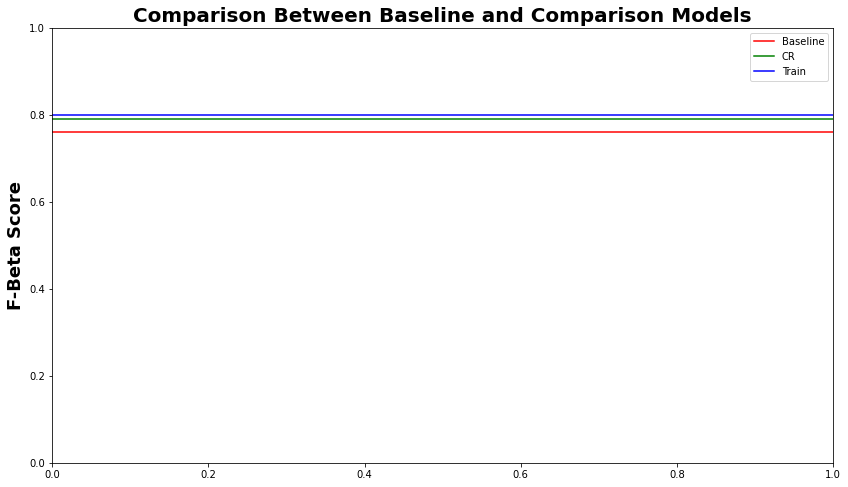

In [79]:
plt.subplots(figsize=(14,8))
plt.axhline(0.76,color='red',label='Baseline')
plt.axhline(0.79,color='green',label='CR')
plt.axhline(0.8,color='blue',label='Train')
plt.title('Comparison Between Baseline and Comparison Models',size=20,fontweight='bold')
plt.ylabel('F-Beta Score',size=18,fontweight='bold')
plt.legend()
plt.show()

- The New Model performes better than Baseline Model

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

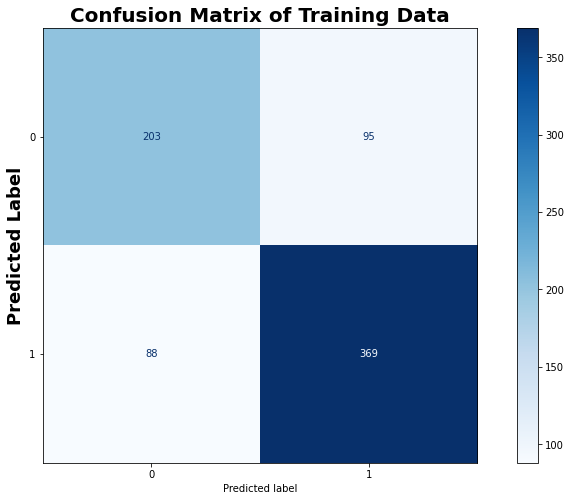

In [81]:
fig ,ax = plt.subplots(figsize=(14,8))
cm = confusion_matrix(y_train, Comparison_Model.predict(X_train))
ConfusionMatrixDisplay(cm).plot(ax=ax,cmap='Blues')
plt.title("Confusion Matrix of Training Data",size=20,fontweight='bold')
plt.ylabel('True Label',size=18,fontweight='bold')
plt.ylabel('Predicted Label',size=18,fontweight='bold')
plt.show()

Tuning the Comparison Model 

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
params = gb_params = {
    'xgbclassifier__n_estimators': [18,19,20,22,24], # The number of boosting stages to perform
    'xgbclassifier__max_depth': [2, 5 ,7 ,11], # The maximum depth of each decision tree
}


In [84]:
model = make_pipeline(RobustScaler(),KNNImputer(),XGBClassifier(random_state = 42))

In [85]:
GS = GridSearchCV(model,param_grid=params,scoring=f_beta,cv=StratifiedKFold(n_splits=8,shuffle=True,random_state=42),return_train_score=True)

In [86]:
GS.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('knnimputer', KNNImputer()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=Fal...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             param_grid={'xgbclassifier__max_depth': [2, 5, 7, 11],
                         'xgbclassifier__n_estimators': [18, 19, 20, 22, 24]},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=0.8))

In [87]:
GS.best_params_

{'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 18}

# Business Goals

- Predict which recipes will lead to high traffic
- Correctly predict high traffic recipes 80% of the time

- My Comparison Model Achieves about 79.52% of prediction is high traffic recipes on the training set,which is achieving business goal of the team which is predict high traffic with 80% of the time ,but i will use the last two models to test status of testing set

### Recommendations
- deploy on production to use.
- test this model many times before using it to get actions on old recipes ,just to make sure thats works well .
- more data will be more accurate results ,because there is few data it will be not accurate to much ,so if it is possible to collect more data it will be good thing.

# KPI ( Key Performance Indicator )
- as i said before we don't need either False Positive/Negative ,so i will choose F-Beta Score and focusing on precision ,in addition to we need High Number of True High Traffic Recipes 

In [88]:
print(f"Comparison Model Performance : {f_beta(Comparison_Model,X_test,y_test)}")

Comparison Model Performance : 0.7986409966024915


In [89]:
print(f"BaseLine Model Performance : {f_beta(BaseLine_model,X_test,y_test)}")

BaseLine Model Performance : 0.7912280701754385


In [90]:
if f_beta(BaseLine_model,X_test,y_test) < f_beta(Comparison_Model,X_test,y_test):
    print('Comparison Model Performance is better than Baseline')
else : 
    print('Comparison Model Performance is worse than Baseline')

Comparison Model Performance is better than Baseline


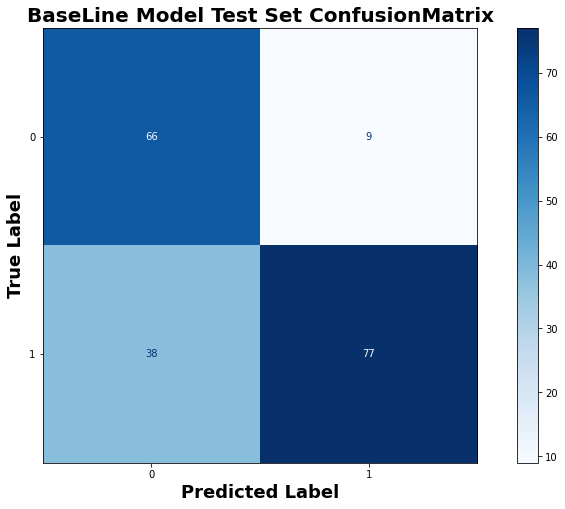

In [91]:
fig ,ax = plt.subplots(figsize=(14,8))
cm = confusion_matrix(y_test, BaseLine_model.predict(X_test))
ConfusionMatrixDisplay(cm).plot(ax=ax,cmap='Blues')
plt.title('BaseLine Model Test Set ConfusionMatrix',size=20,fontweight='bold')
plt.ylabel('True Label',size=18,fontweight='bold')
plt.xlabel('Predicted Label',size=18,fontweight='bold')
plt.show()

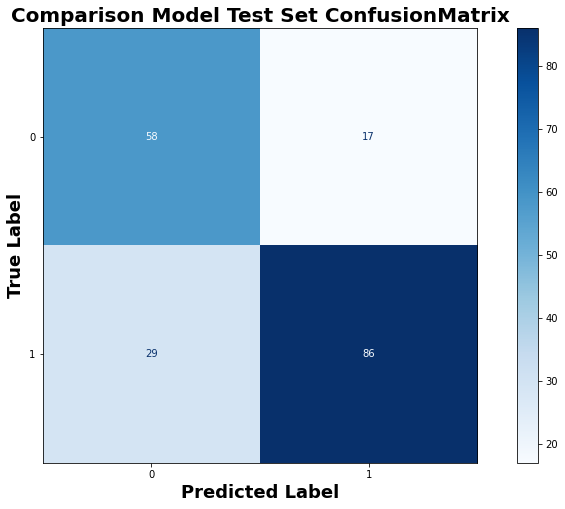

In [92]:
fig ,ax = plt.subplots(figsize=(14,8))
cm = confusion_matrix(y_test, Comparison_Model.predict(X_test))
ConfusionMatrixDisplay(cm).plot(ax=ax,cmap='Blues')
plt.title('Comparison Model Test Set ConfusionMatrix',size=20,fontweight='bold')
plt.ylabel('True Label',size=18,fontweight='bold')
plt.xlabel('Predicted Label',size=18,fontweight='bold')
plt.show()

|   |total high traffic recipes|true high recipes predictions|false positive|false negative|   |
|--|--|--|--|--|--|
|model1 if 74.8% not 67%|115|74.8%|14.8%|22.6%|
|model2|115|74.8%|16.5%|25.2%|

- now the comparison is fair ,but we missed the important thing ,that we need to predict high traffic recipes as much as we can ,so model 2 predicted 86 from 115 while model 1 predicted 77 from 115
- so the model 2 is best than model 1 ,while the difference between them on the calculations is small 

### Comparison Model achieve about 83.5% for predicting high traffic recipes ,which is higher than business goal "80%"
Also I Choosed The comparison model because it predict more true high traffic from all high traffic unlike baseline model while baseline model achieved only 77 and comparison model achieved 86 from 115.
This score is according to my available data ,but to make sure the team should provide the model with more data and test the model many times to make sure it works well

# Summary And Recommendations

|||||
| --- | --- | --- |---|
|![Alt text](BM.png "Percentage of each Category for each traffic status")|![Alt text](BM1.png "Percentage of each Category")|![Alt text](Cat.png "Percentage of each Category")|![Alt text](servings.png "Servings")|

The business is focusing on chicken recipes and breakfast, but neither is giving the business a high traffic for their website. If we look at the second chart, we can see that vegetable, potato, pork, and meat recipes are the recipes that receive high traffic from users. Additionally, when I looked at the first chart, I noticed that these recipes have a lower number of recipes, which could result in losing more users from the website and decrease the traffic.

- business should cares about Vegetable ,Potato ,Pork recipes instead of Chicken ,Beverages ,Breakfast
- Focus on recipes that have 4 servings 
- deploy the model on production to use.
- test this model many times on old recipes before using it to get actions ,just to make sure thats works well .
- more data will be more accurate results ,because there is few data it will be not accurate to much ,so if it is possible to collect more data it will be good thing.